In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import seaborn as sns

from tensorflow.keras import Sequential, layers, models  
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from keras import Input
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
#Read the csv files and shape the vectors into images. The training file contains vectors of size 784 representing pixel values of a 28x28 image
x_train_values = pd.read_csv("x_train.csv").values
x_test_values = pd.read_csv("x_test.csv").values
y_train_values = pd.read_csv("y_train.csv").values
y_test_values = pd.read_csv("y_test.csv").values

x_train_raw = x_train_values.reshape(-1, 28, 28, 1)
x_test_raw = x_test_values.reshape(-1, 28, 28, 1)
x_train = x_train_raw / 255.0
x_test = x_test_raw / 255.0

y_train_flat = y_train_values.flatten()
y_test_flat = y_test_values.flatten()
y_train = to_categorical(y_train_flat, num_classes=5)
y_test = to_categorical(y_test_flat, num_classes=5)


In [3]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

begin = time.time()
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
end = time.time()

print(f"\nRuntime for training and testing the model: {(end-begin)/60} minutes") 


C:\Users\nashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8446 - loss: 0.4253 - val_accuracy: 0.9568 - val_loss: 0.1421
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9556 - loss: 0.1369 - val_accuracy: 0.9584 - val_loss: 0.1255
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9648 - loss: 0.1099 - val_accuracy: 0.9666 - val_loss: 0.1009
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9717 - loss: 0.0929 - val_accuracy: 0.9669 - val_loss: 0.1050
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9728 - loss: 0.0882 - val_accuracy: 0.9730 - val_loss: 0.0816
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9758 - loss: 0.0763 - val_accuracy: 0.9744 - val_loss: 0.0760
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9779 - loss: 0.0686 - val_accuracy: 0.9718 - val_loss: 0.0804
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9785 -

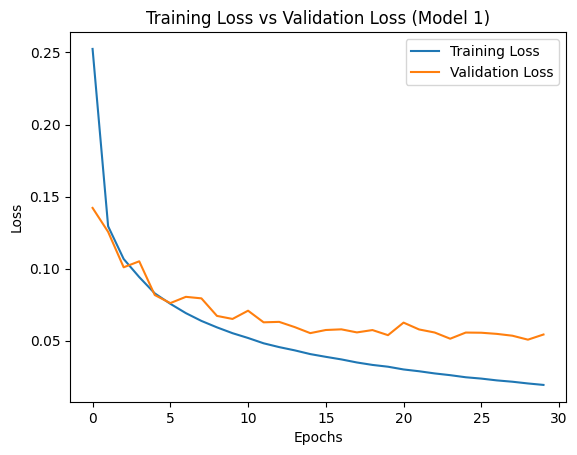

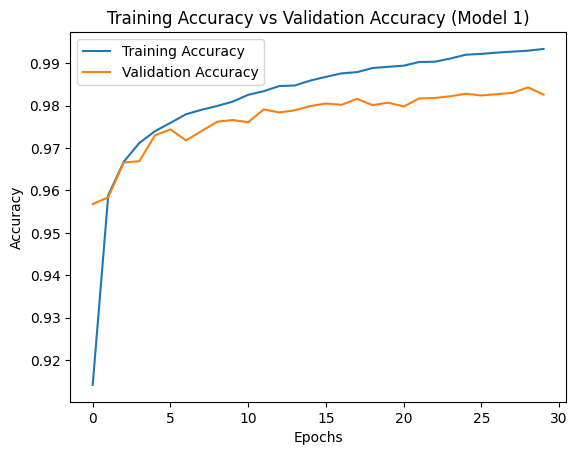

In [4]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss (Model 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy (Model 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,223,911 (12.30 MB)

 Trainable params: 3,223,909 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
# Improved model. Improvements are adding dropout,changing optimizer to Adam (which takes much longer than SGD) and adding data augmentation
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

improved_model = models.Sequential()
improved_model.add(data_augmentation)
improved_model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu'))
improved_model.add(Flatten())
improved_model.add(layers.Dropout(0.1))
improved_model.add(layers.Dense(512, activation='relu'))
improved_model.add(Dense(5, activation='softmax'))

begin = time.time()
improved_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
improved_history = improved_model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
end = time.time()

print(f"\nRuntime for training and testing the model: {(end-begin)/60} minutes") 

C:\Users\nashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 61ms/step - accuracy: 0.8635 - loss: 0.3778 - val_accuracy: 0.9512 - val_loss: 0.1509
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.9503 - loss: 0.1492 - val_accuracy: 0.9430 - val_loss: 0.1683
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 68ms/step - accuracy: 0.9604 - loss: 0.1226 - val_accuracy: 0.9626 - val_loss: 0.1158
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 117s 62ms/step - accuracy: 0.9663 - loss: 0.1050 - val_accuracy: 0.9658 - val_loss: 0.1057
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 61ms/step - accuracy: 0.9689 - loss: 0.0928 - val_accuracy: 0.9691 - val_loss: 0.1025
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.9728 - loss: 0.0862 - val_accuracy: 0.9586 - val_loss: 0.1220
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9730 - loss: 0.0797 - val_accuracy: 0.9754 - val_loss: 0.0765
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 63ms/step - accuracy: 

In [41]:
improved_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 28, 28, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 14, 14, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 14, 14, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 6272)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 6272)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 512)                   │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 5)                     │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,671,729 (36.89 MB)

 Trainable params: 3,223,909 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,447,820 (24.60 MB)

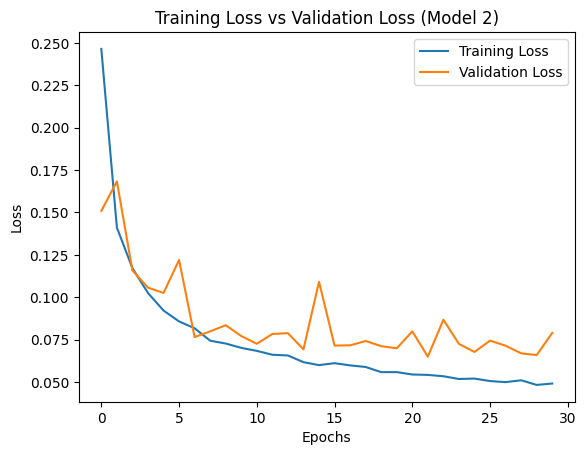

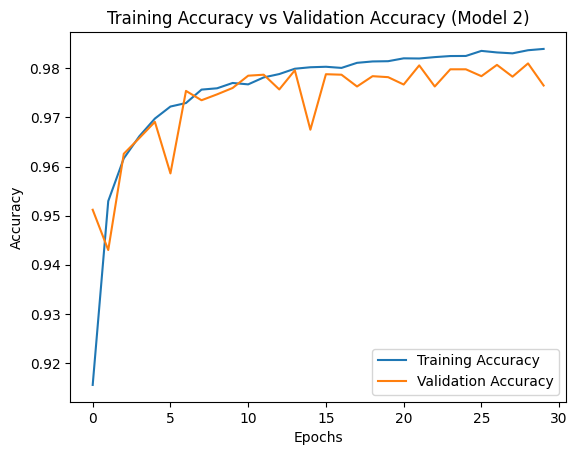

In [40]:
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(improved_history.history['accuracy'], label='Training Accuracy')
plt.plot(improved_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
print(f"Input: {improved_model.layers[0]}")
print(f"Output: {improved_model.layers[6]}")

intermediate_layer_model = Model(inputs=improved_model.layers[0].input, outputs=improved_model.layers[6].output)
intermediate_output = intermediate_layer_model.predict(x_train)
print(f"Intermediate Output:\n {intermediate_output}")
print(f'\nShape of Intermediate Output: {intermediate_output.shape}')

Input: <Sequential name=sequential_2, built=True>
Output: <Dense name=dense_2, built=True>
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step
Intermediate Output:
 [[0.         0.         0.         ... 0.         0.         0.19534582]
 [0.         1.8617036  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         2.4573743 ]
 [0.         0.         0.         ... 0.         0.         0.10636547]]

Shape of Intermediate Output: (60000, 512)


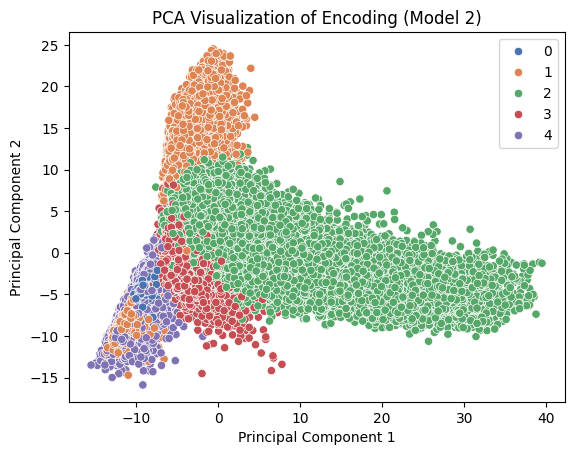

In [43]:
pca = PCA(n_components=2, random_state=42)
PCA_output = pca.fit_transform(intermediate_output)

sns.scatterplot(x=PCA_output[:, 0], y=PCA_output[:, 1], hue=y_train_flat, palette="deep")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Encoding (Model 2)")
plt.show()

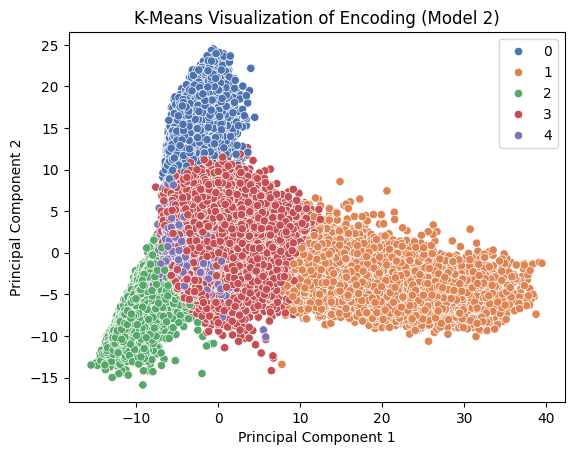

In [44]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_output = kmeans.fit_predict(intermediate_output)

pca = PCA(n_components=2, random_state=42)
PCA_output = pca.fit_transform(intermediate_output)

sns.scatterplot(x=PCA_output[:, 0], y=PCA_output[:, 1], hue=kmeans_output, palette="deep")

plt.title("K-Means Visualization of Encoding (Model 2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


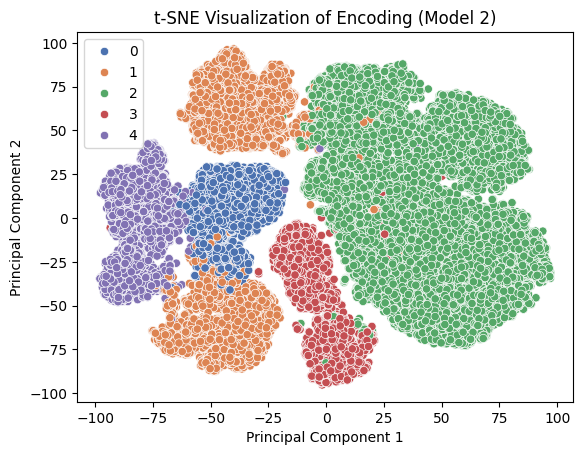

In [9]:
tsne = TSNE(n_components=2, random_state=42)
tsne_output = tsne.fit_transform(intermediate_output)

sns.scatterplot(x=tsne_output[:, 0], y=tsne_output[:, 1], hue=y_train_flat, palette="deep")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("t-SNE Visualization of Encoding (Model 2)")
plt.show()

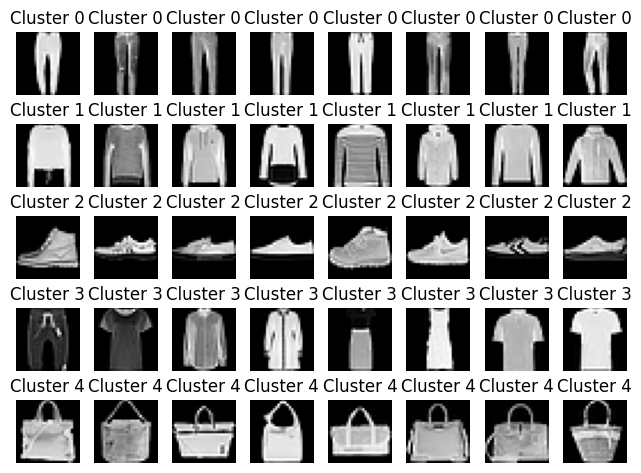

In [45]:
samples = 8

clusters = {i: [] for i in range(5)}
for index, cluster in enumerate(kmeans_output):
    clusters[cluster].append(x_train_raw[index])

fig, axs = plt.subplots(len(clusters), samples)
for cluster_num, images in clusters.items():
    sample_images = np.random.choice(len(images), samples, replace=False)
    for index, image_index in enumerate(sample_images):
        axis = axs[cluster_num, index]
        axis.imshow(images[image_index], cmap='gray')
        axis.set_title(f"Cluster {cluster_num}")
        axis.axis("off")
plt.tight_layout()
plt.show()
